# <code style="color:Crimson">3. CLUSTER ANALYSIS</code>


At last, it's time to build the clustering model. For clustering problems, the chosen input features are usually more important than which algorithm you use.
* First, we'll apply the K-Means algorithm to 3 different feature sets.
* There are no clear, widely-accepted performance metrics for clusters because there're no target labels.
* Even so, we can compare the different clusters created from the 3 different feature sets.

## Importing the libraries

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Scikit-Learn's make_pipeline function
from sklearn.pipeline import make_pipeline

# Scikit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans


#### Read in the dataset

#### Next, read in the 3 CSV files we've saved throughout this project.
* <code style="color:crimson">'analytical_base_table.csv'</code> as <code style="color:steelblue">base_df</code>. 
* <code style="color:crimson">'threshold_item_data.csv'</code> as <code style="color:steelblue">threshold_item_data</code>. 
* <code style="color:crimson">'pca_item_data.csv'</code> as <code style="color:steelblue">pca_item_data</code>. 
* And, set <code style="color:steelblue">index_col=0</code> for each one to use CustomerID as the index.

In [2]:
# Import analytical base table
base_df = pd.read_csv('analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('pca_item_data.csv', index_col=0)

## <span style="color:RoyalBlue">Feature Sets</span>

Because K-Means creates clusters based on distances, and because distances are calculated by between observations defined by their feature values, **the features we choose to input into the algorithm heavily influence the clusters that are created.** 

For this project, we will look at 3 possible feature sets and compare the clusters created from them.
1. Only purchase pattern features (**"Base DF"**)
* Purchase pattern features + item features chosen by threshold (**"Threshold DF"**)
* Purchase pattern features + principal component features from items (**"PCA DF"**)

Let's create those feature sets.

#### A. First, print the shape of each dataframes.
* We should have **8 features** for **analytical base table.** These are the customer-level purchase pattern features.
* We should have **20 features** for **thresholded item features.** These are the number of times a customer purchased each of the top 20 most popular items.
* We should have **125 features** for the **PCA item features.** These are the first 125 principal component features, ordered by explained variance.

In [3]:
# Print shape of each dataframe
print('base_df:', base_df.shape)
print('threshold_item_data:', threshold_item_data.shape)
print('pca_item_data:', pca_item_data.shape)

base_df: (414, 8) threshold_item_data: (414, 20) pca_item_data: (414, 125)


We already have a <code style="color:steelblue">base_df</code>.

<br>
<br>

#### B. Next, create a <code style="color:steelblue">threshold_df</code> by joining the <code style="color:steelblue">base_df</code> with <code style="color:steelblue">threshold_item_data</code>.
* Then, display the first 5 rows of the new dataframe.

In [4]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

In [ ]:
# Display first 5 rows of threshold_df
threshold_df.head()

#### C. Finally, create a <code style="color:steelblue">pca_df</code> by joining <code style="color:steelblue">base_df</code> with <code style="color:steelblue">pca_item_data</code>.
* Then, display the first 5 rows of the new dataframe.

In [5]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

In [33]:
# Display first 5 rows of pca_df
pca_df.head()

PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
        ..
PC121    0
PC122    0
PC123    0
PC124    0
PC125    0
Length: 125, dtype: int64


## <span style="color:RoyalBlue">Cluster 1: Base DF Clustering</span>

Now that we have our 3 candidate feature sets and the K-Means algorithm imported, we're ready to start making clusters! The first set of features we'll consider is **"Base DF"**. This only includes the purchase pattern features from our analytical base table.

So, **how many clusters** should we set?
* As with much of Unsupervised Learning, there's no right or wrong answer.
* Typically, we should consider how the client will use these clusters.
* For example, let's say our client, the online gift retailer, employs 3 customer service reps, and they want to assign one cluster to each rep.
* In that case, the obvious answer is 3. Therefore, we'll set the number of clusters to 3. 

<br>
<br>

#### A. First, let's display the first 5 observations from <code style="color:steelblue">base_df</code> just as a reminder.

In [7]:
base_df.head(5)

,nunique,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


Next, let's create a **model pipeline**.
* K-Means calculates clusters based on distances.
* We wouldn't want a large feature (with large variances) to dominate our algorithm.
* Therefore, we should **scale** our features before fitting the model.

<br>
<br>

#### B. Initialize a model pipeline for K-Means.
* We can control the number of clusters using <code style="color:steelblue">n_clusters=3</code>. This is the hyperparameter $k$ (as in "k"-means).
* Let's also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [8]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(),
                        KMeans(n_clusters=3, random_state=123))

#### C. Now we can fit a K-Means model on Base DF.

In [9]:
# Fit K-Means pipeline
k_means.fit(base_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

#### D. Finally, let's call <code style="color:steelblue">.predict()</code> on the dataset to get the clusters.
* Save the clusters as a new column in the Base DF.
* Display the first 5 rows of the Base DF (note the new 'cluster' column below).

In [10]:
# Save clusters to base_df
base_df['cluster'] = k_means.predict(base_df)

# Display first 5 rows of base_df
base_df.head()

,nunique,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,2
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


we can now see the new <code style="color:steelblue">'cluster'</code> column that has the cluster that each customer was assigned to. Since we set $k=3$, the possible values will be <code style="color:crimson">0</code>, <code style="color:crimson">1</code>, or <code style="color:crimson">2</code>.

<br>
<br>

#### E. Plot a scatterplot of total sales vs. average cart value, and color the points by cluster.
* Since it's impossible to visualize all of the features, we'll just pick 2.
* Remember, you can use the <code style="color:steelblue">hue=</code> argument to color by cluster when using Seaborn's <code style="color:steelblue">.lmplot()</code>.

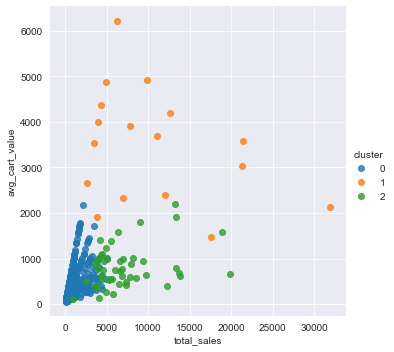

In [11]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data= base_df, fit_reg=False)
plt.show()

## <span style="color:RoyalBlue">Cluster 2: Threshold DF Clustering</span>

The second set of features we'll consider is **"Threshold DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the purchase counts for the 20 most popular items.

We'll repeat the same steps as above.

<br>
<br>

#### A. First, initialize a new model pipeline for K-Means.
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [12]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(),
                        KMeans(n_clusters=3, random_state=123))

#### B. Next, fit the K-Means model pipeline to <code style="color:steelblue">threshold_df</code>.

In [13]:
# Fit K-Means pipeline
k_means.fit(threshold_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

#### C. Save the predicted clusters to <code style="color:steelblue">threshold_df</code> as a new column.
* Then display the first 5 rows

In [14]:
# Save clusters to base_df
threshold_df['cluster'] = k_means.predict(threshold_df)

# Display first 5 rows of base_df
threshold_df.head()

,nunique,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,...,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,...,0,0,0,0,0,0,0,0,4,1
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,...,0,0,0,0,1,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,1,0,0,0,0,0,0,0,1,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,1,0,0,2,0,5,1




#### D. To visualize these clusters, let's plot a scatterplot and color the points by cluster.
* Use the same 2 features as in the scatterplot from the previous exercise so that we can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

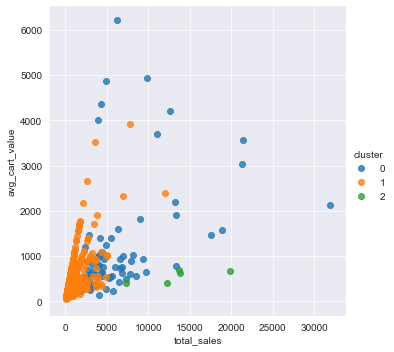

In [15]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=threshold_df, hue = 'cluster', fit_reg=False)

## <span style="color:RoyalBlue">Cluster 3: PCA DF Clustering</span>

The last set of features we'll consider is **"PCA DF"**. 
* This includes the purchase pattern features from our analytical base table.
* This also includes the first 125 principal component features from the item data.


#### A. First, initialize a new model pipeline for K-Means.
* Set it to create 3 clusters.
* Also set <code style="color:steelblue">random_state=123</code> for replicable results. 

In [16]:
# K-Means model pipeline
k_means = make_pipeline(StandardScaler(),
                        KMeans(n_clusters=3, random_state=123))

#### B. Next, fit the K-Means model pipeline to <code style="color:steelblue">pca_df</code>.

In [17]:
# Fit K-Means pipeline
k_means.fit(pca_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

#### C. Save the clusters to <code style="color:steelblue">pca_df</code>.

In [28]:
# Save clusters to pca_df
pca_df['cluster'] = k_means.predict(pca_df)

# Display first 5 rows of pca_df
pca_df.head()

ValueError: operands could not be broadcast together with shapes (414,134) (133,) (414,134) 

<br>
<br>


#### D. To visualize these clusters, let's plot a scatterplot and color the points by cluster.
* Use the same 2 features as in the scatterplot above so that you can visually contrast the plots.
* Use the <code style="color:steelblue">hue=</code> argument to color by cluster.

IndexError: invalid index to scalar variable.

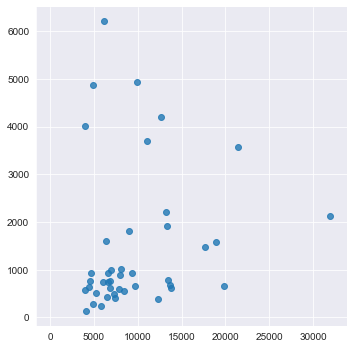

In [26]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', data=pca_df, hue = 'cluster', fit_reg=False)


## <span style="color:RoyalBlue">Model "Comparison"</span>

Here's what we have so far:
1. Clusters created by only using purchase pattern features (saved in <code style="color:steelblue">base_df</code>)
2. Clusters created by using purchase pattern features **and** thresholded item data (saved in <code style="color:steelblue">threshold_df</code>)
3. Clusters created by using purchase pattern features **and** PCA item data (saved in <code style="color:steelblue">pca_df</code>)

Most importantly, each of those 3 dataframes have the same indices. They each still have the **CustomerID's** as their indices. This helps us directly compare and constrast the clusters created from those 3 clustering approaches.

#### Again,  there aren't any clear, widely-accepted *performance metrics* for clustering tasks because we don't have target variables.
* For regression, we can calculate the error between your predictions and the true values.
* For classification, we can calculate the AUROC of your predictions and the true classes.
* For clustering, we don't know what's "true."

Therefore, it's usually more useful to just compare the clusters created by different approaches.

<br>
<br>

#### A. First, let's import <code>adjusted_rand_score</code> from <code>sklearn.metrics</code>.
* The **adjusted Rand index** is a similarity measure between two clusterings. It essentially counts the observations that were assigned to the same or different clusters by two different clusterings. 
* Values close to 0.0 indicate random/independent clusters
* Values close to 1.0 indicate nearly identical clusters
* The adjusted Rand index is **symmetric**, which means we can pass in the clusters in any order

In [34]:
# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

#### B. For example, let's display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>.

In [35]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

#### C. Next, let's display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.

In [36]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.6652762487548387

#### D. Finally, let's display the adjusted Rand index between <code style="color:steelblue">threshold_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.


In [37]:
# Similary between threshold_df.cluster and pca_df.cluster
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.5249125831594715

#### At this point, there's actually not much more we can do independently. The key is that we've seen the **major tools** that go into a successful cluster analysis. 


#### 5 tips to consider:
1. Keep the algorithm simple.
2. Only input relevant features.
3. Standardize the features before clustering.
4. Try different sets of features and compare the clusters created.
5. Communicate proactively with the key stakeholder.